In [39]:
import pandas as pd
import numpy as np
import re
import os

import trmc.load as load
import trmc.analysis as analysis
import trmc.plot as plot
from trmc.plot import exp_formatter

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter, FuncFormatter
%matplotlib inline

import xarray as xr

from IPython.display import clear_output
from collections import OrderedDict
import itertools

In [40]:
%store -r da_dv
%store -r da_bv
%store -r da_sw
%store -r da_dcs

da_dv = da_dv.load()

sample = 'cs'

da_dv = da_dv.sel(sample = sample)
da_dcs = da_dcs.sel(sample = sample)

0.01729


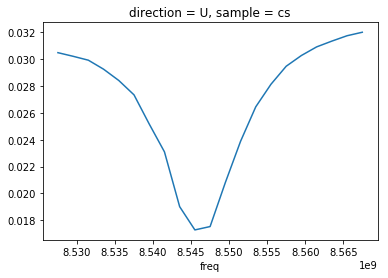

In [48]:
bvs = da_bv.sel(sample = 'cs', direction = 'U').dropna('freq')
bvs.plot()
bv = bvs.min().item()
print(bv)

In [56]:
v0 = bvs

freqs = v0.indexes['freq']
fittype = 'lor'
Rinf = 0.02125
f0 = None
p0 =[f0,0.01,Rinf,1e7]
p_labels = ['f0','R0','Rinf','w'] 
epsilon = 0.001 #problems with fixing R0 when this gets too smalll??? fit does not respond to bounds on R0 properly...
window = 100

p0 =[f0,0.01,Rinf,1e7]
bounds = ([0,0,0, 0],[np.inf,np.inf,np.inf, np.inf])
v0_fit, v0_p,v0_sl = analysis.fitsweep(v0, p0, bounds, window , fittype,p_labels)
popt = v0_p[0]
v0_fit(freqs)

K = analysis.calc_K(f0 = popt[0], R0_norm = popt[1]/popt[2],w = popt[3], printparams = False)

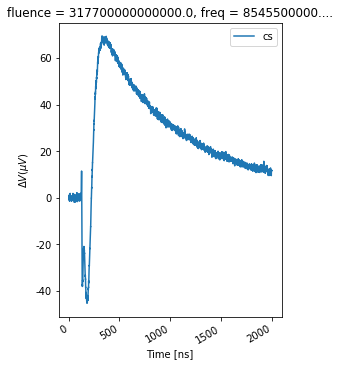

In [41]:


g = da_dv.dropna('fluence','all').dropna('freq','all').sel(direction = 'U').isel(fluence = -1).isel(freq = 9).plot(label = sample, figsize = (4,6))

plt.gca().xaxis.set_major_formatter(FuncFormatter(plot.exp_formatter(-9).func))
plt.gca().yaxis.set_major_formatter(FuncFormatter(plot.exp_formatter(-6).func))
plt.gca().set_ylabel('$\Delta V (\mu V)$')

plt.gcf().autofmt_xdate()
plt.legend()

In [61]:
G = da_dv/(K*bv)

G.name = '$\Delta G$'
G.attrs = dict(units = 'S', long_name = '$\Delta G$')

# da_dv.coords['freq'].attrs = dict(units = 'Hz', long_name = 'Frequency')
# da_dv.coords['fluence'].attrs = dict(units = '$\#/cm^2/pulse$', long_name = 'Fluence')
# da_dv.coords['time'].attrs = dict(units = 'ns', long_name = 'Time')

G

<xarray.DataArray '$\\Delta G$' (direction: 2, freq: 44, fluence: 9, time: 10000)>
array([[[[nan, ..., nan],
         ...,
         [nan, ..., nan]],

        ...,

        [[nan, ..., nan],
         ...,
         [nan, ..., nan]]],


       [[[nan, ..., nan],
         ...,
         [nan, ..., nan]],

        ...,

        [[nan, ..., nan],
         ...,
         [nan, ..., nan]]]])
Coordinates:
  * fluence    (fluence) float64 3.177e+08 4.212e+08 ... 3.177e+14 4.212e+14
  * freq       (freq) float64 8.524e+09 8.526e+09 ... 8.568e+09 8.568e+09
  * direction  (direction) object 'D' 'U'
  * time       (time) float64 0.0 2e-10 4e-10 6e-10 ... 1.999e-06 2e-06 2e-06
    sample     <U2 'cs'
Attributes:
    units:      S
    long_name:  $\Delta G$

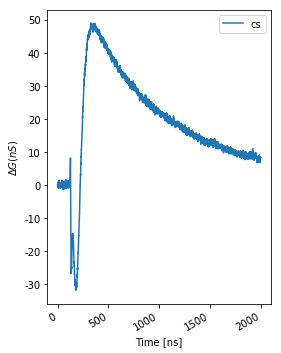

In [74]:


g = G.dropna('fluence','all').dropna('freq','all').sel(direction = 'U').isel(fluence = -1).isel(freq = 9).plot(label = sample, figsize = (4,6))

plt.gca().xaxis.set_major_formatter(FuncFormatter(plot.exp_formatter(-9).func))
# plt.gca().set_xlabel('$Time \ (\mu S)$')
plt.gca().set_title('')
plt.gca().yaxis.set_major_formatter(FuncFormatter(plot.exp_formatter(-9).func))
plt.gca().set_ylabel('$\Delta G (nS)$')

plt.gcf().autofmt_xdate()
plt.legend()

(1e-07, 7.5e-07)

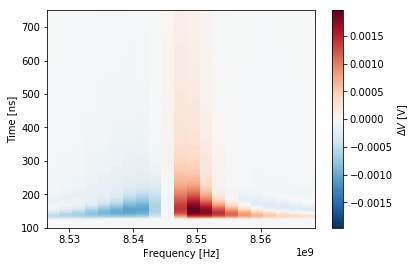

In [42]:
g = da_dv.dropna('fluence','all').dropna('freq','all').sel(direction = 'U').isel(fluence = -1).plot(x = 'freq')

plt.gca().yaxis.set_major_formatter(FuncFormatter(plot.exp_formatter(-9).func))
plt.gca().set_title('')
plt.gca().set_ylim([100e-9,750e-9])
# plt.gca().yaxis.set_major_formatter(FuncFormatter(plot.exp_formatter(-6).func))
# plt.gca().set_ylabel('$\Delta V (\mu V)$')

# plt.gcf().autofmt_ydate()
# plt.legend()

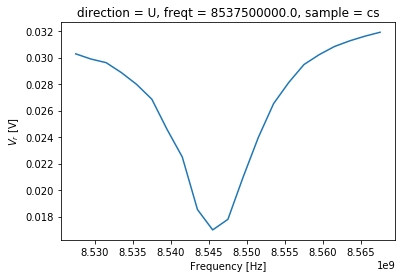

In [43]:
da_dcs.dropna('freqt','all').sel(direction = 'U').isel(freqt = 5).dropna('freq').plot()